# Project: Investigate a Dataset - Energy Generation vs Population Trends 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

Datasets selected where extrated from **Gapminder World** and correspond to the population per year by country worldwide and the energy production in toe (tonnes of oil equivalent) per year by the countries worldwide. This datasets where chosen in order to correlate the population growth trend versus the energy production trend.


### Question(s) for Analysis

- *Wich are the trends of World Energy Production and Population from the last century?*

- *Now, wich are the Energy Production per continent and Population trends from the last century?*



**Importing the packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

### General Properties

**Loading data**

In [2]:
population = pd.read_csv('population_total.csv')
energy = pd.read_csv('energy_production_total.csv')

**Set countries as indexes**

In [3]:
population.set_index('country',inplace=True)
energy.set_index('country',inplace=True)

**Filter years of interest**

*In order to have the most recent information of the datasets*

In [4]:
max(population.columns),max(energy.columns)

('2099', '2009')

In [5]:
population_df = population.loc[:,'2000':'2009']
energy_df = energy.loc[:,'2000':'2009']

**Estructure of the datasets**

In [6]:
population_df.shape,energy_df.shape

((197, 10), (135, 10))

In [7]:
population_df.head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
country,,,,,,,,,,
Afghanistan,21.6M,22.6M,23.7M,24.7M,25.7M,26.4M,27.1M,27.7M,28.4M,29.2M
Angola,16.9M,17.5M,18.1M,18.8M,19.4M,20.1M,20.9M,21.7M,22.5M,23.4M
Albania,3.13M,3.13M,3.12M,3.1M,3.09M,3.06M,3.03M,3M,2.97M,2.95M
Andorra,67.3k,70k,73.2k,76.3k,78.9k,81k,82.7k,83.9k,84.5k,84.5k
United Arab Emirates,3.3M,3.48M,3.71M,4.07M,4.59M,5.3M,6.17M,7.09M,7.92M,8.55M


In [8]:
energy_df.head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
country,,,,,,,,,,
Angola,43.5k,51.4k,51.4k,57.6k,70.9k,80k,95k,106k,101k,NaN
Albania,883,959,1050,1150,1170,1190,1060,1150,1250,NaN
United Arab Emirates,152k,149k,163k,171k,174k,185k,186k,187k,169k,NaN
Argentina,84.5k,81.3k,84.3k,87.1k,84.7k,86.2k,82.9k,82.9k,80.8k,NaN
Armenia,602,738,692,746,861,846,826,797,825,NaN


In [9]:
population_df.isnull().sum().any(),energy_df.isnull().sum().any()

(False, True)

In [10]:
population_df.info(),energy_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 197 entries, Afghanistan to Zimbabwe
Data columns (total 10 columns):
2000    197 non-null object
2001    197 non-null object
2002    197 non-null object
2003    197 non-null object
2004    197 non-null object
2005    197 non-null object
2006    197 non-null object
2007    197 non-null object
2008    197 non-null object
2009    197 non-null object
dtypes: object(10)
memory usage: 16.9+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 135 entries, Angola to Zimbabwe
Data columns (total 10 columns):
2000    135 non-null object
2001    135 non-null object
2002    135 non-null object
2003    135 non-null object
2004    135 non-null object
2005    135 non-null object
2006    135 non-null object
2007    135 non-null object
2008    135 non-null object
2009    34 non-null object
dtypes: object(10)
memory usage: 11.6+ KB


(None, None)

In [11]:
sum(population_df.duplicated()),sum(energy_df.duplicated())

(0, 0)

In [12]:
sum(energy_df['2009'].isnull())

101

**Summary of the datasets:**
- Correspond to two csv files, one from the population and the other for the energy production in (toe)
- Population data has 197 rows and 10 columns
- Energy data has 135 rows and 10 columns
- Energy 2009 column contains 101 NaN values
- All columns in both datasets corresponds to strings values
- Both datasets has no duplicates


### Data Cleaning
 

**Copying datasets**

In [13]:
df_population = population_df.copy()
df_energy = energy_df.copy()

**Changing data type ('str' to 'float')**

In [14]:
def types_fix(df):
    for c in df.columns:
        df[c] = df[c].str.replace('.','')
        df[c] = df[c].str.replace('k','000')
        df[c] = df[c].str.replace('M','000000')
        df[c] = df[c].str.replace('B','000000000')
        df[c] = df[c].astype('float')

In [15]:
types_fix(df_population)
types_fix(df_energy)

**Dropping 'NaN' values**

*We will drop the entire 2009 energy dataset column, which implies dropping the 2009 population column as well*

In [16]:
df_population.drop(['2009'],axis=1,inplace=True)
df_energy.drop(['2009'],axis=1,inplace=True)

**Changing data type ('float' to 'int')**

In [17]:
df_population = df_population.astype('int')
df_energy = df_energy.astype('int')

**Checking changes**

In [18]:
(df_population.dtypes=='int64').values,(df_energy.dtypes=='int64').values

(array([ True,  True,  True,  True,  True,  True,  True,  True,  True], dtype=bool),
 array([ True,  True,  True,  True,  True,  True,  True,  True,  True], dtype=bool))

**Filter countries contained in both datasets**

In [19]:
index = df_population.index.join(df_energy.index,'inner')

In [20]:
df_population = df_population.loc[index]
df_energy = df_energy.loc[index]

<a id='eda'></a>
## Exploratory Data Analysis

### World Energy Production vs Population from 2000 to 2009

#### Exploratory analysis of the dataframes

In [88]:
df_population.describe()

,2000,2001,2002,2003,2004,2005,2006,2007,2008
count,1.340000e+02,1.340000e+02,1.340000e+02,1.340000e+02,1.340000e+02,1.340000e+02,1.340000e+02,1.340000e+02,1.340000e+02
mean,1.218364e+09,2.116849e+09,2.159880e+09,2.147672e+09,2.190950e+09,2.215325e+09,2.228624e+09,1.469960e+09,2.298818e+09
std,9.361358e+09,1.462944e+10,1.480307e+10,1.491774e+10,1.509235e+10,1.526989e+10,1.539165e+10,1.166827e+10,1.568022e+10
min,2.830000e+05,2.850000e+05,2.880000e+05,2.910000e+05,2.950000e+05,3.000000e+05,3.050000e+05,3.110000e+05,3.160000e+05
25%,1.272500e+08,1.295000e+08,1.542500e+08,1.280000e+08,1.402500e+08,1.430000e+08,1.370000e+08,1.662500e+08,1.590000e+08
50%,2.485000e+08,2.525000e+08,3.000000e+08,2.575000e+08,2.810000e+08,2.780000e+08,2.780000e+08,3.105000e+08,3.090000e+08
75%,4.840000e+08,5.155000e+08,5.275000e+08,4.857500e+08,5.215000e+08,5.240000e+08,5.397500e+08,6.002500e+08,6.075000e+08
max,1.080000e+11,1.310000e+11,1.320000e+11,1.320000e+11,1.330000e+11,1.340000e+11,1.350000e+11,1.350000e+11,1.360000e+11


In [81]:
df_energy.describe()

,2000,2001,2002,2003,2004,2005,2006,2007,2008
count,1.340000e+02,1.340000e+02,1.340000e+02,1.340000e+02,1.340000e+02,1.340000e+02,1.340000e+02,1.340000e+02,1.340000e+02
mean,2.974311e+06,3.069295e+06,3.207679e+06,3.389336e+06,2.692435e+06,3.601923e+06,3.709258e+06,2.715561e+06,3.870003e+06
std,1.928533e+07,1.958570e+07,2.036682e+07,2.151886e+07,1.977271e+07,2.303216e+07,2.367661e+07,2.024998e+07,2.509440e+07
min,0.000000e+00,1.910000e+02,3.100000e+01,2.340000e+02,5.100000e+01,2.000000e+02,1.920000e+02,1.010000e+02,1.040000e+02
25%,2.330000e+03,2.355000e+03,2.415000e+03,2.422500e+03,2.835000e+03,3.305000e+03,3.500000e+03,3.715000e+03,3.572500e+03
50%,1.045000e+05,1.235000e+05,1.065000e+05,1.080000e+05,1.055000e+05,1.065000e+05,1.140000e+05,1.100000e+05,1.235000e+05
75%,2.252500e+05,2.625000e+05,2.522500e+05,2.605000e+05,2.692500e+05,2.447500e+05,2.725000e+05,2.370000e+05,2.457500e+05
max,1.690000e+08,1.660000e+08,1.630000e+08,1.650000e+08,1.630000e+08,1.730000e+08,1.820000e+08,1.990000e+08,2.080000e+08


#### Visualization

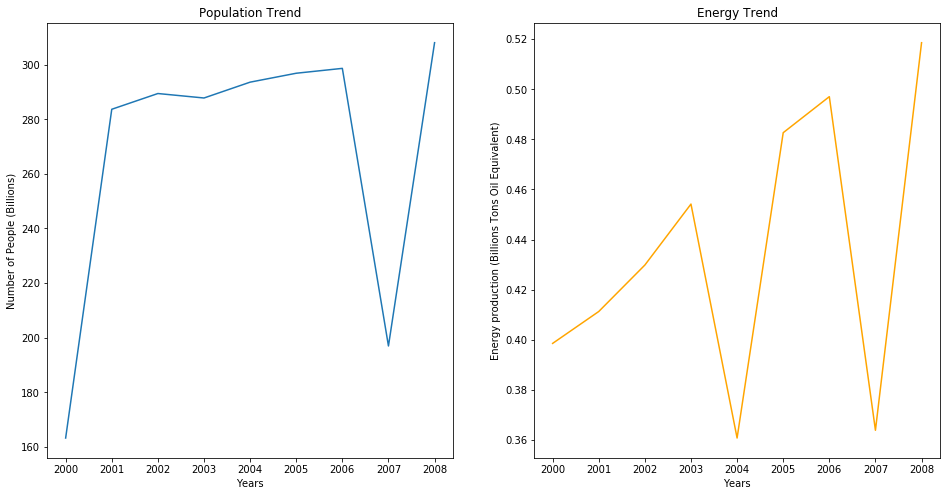

In [21]:
plt.figure(figsize=(16,8))
ax1 = plt.subplot(121)
ax1.plot(np.sum(df_population)/10**9)
plt.xlabel('Years')
plt.ylabel('Number of People (Billions)')
plt.title('Population Trend')
ax2 = plt.subplot(122)
ax2.plot(np.sum(df_energy)/10**9,'orange')
plt.xlabel('Years')
plt.ylabel('Energy production (Billions Tons Oil Equivalent)')
plt.title('Energy Trend');

Now if we get the proportions of the data in order to merge the trends plots and see it in the same order of magnitude

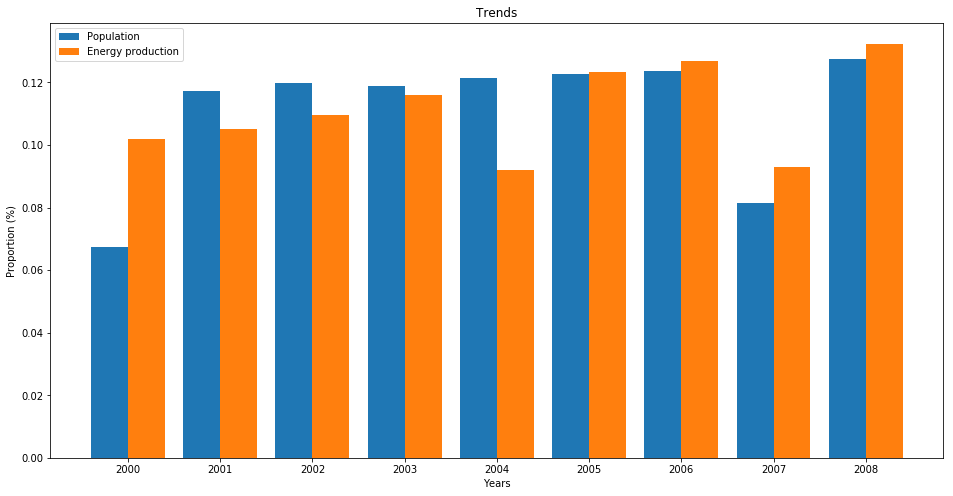

In [59]:
plt.figure(figsize=(16,8))
x1 = np.arange(1999.8,2008.8,1)
x2 = np.arange(2000.2,2009,1)
plt.bar(x1,np.sum(df_population)/sum(np.sum(df_population)),width=0.4)
plt.bar(x2,np.sum(df_energy)/sum(np.sum(df_energy)),width=0.4)
plt.xlabel('Years')
plt.xticks(np.arange(2000,2009,1))
plt.ylabel('Proportion (%)')
plt.title('Trends')
plt.legend(['Population','Energy production']);

**Observations:**
- Both could be consider as a positive trends but with different rates.
- Population trend has a major increase in the year 2001 and a recovery increase in 2008.
- Energy has two years of decrease, 2004 and 2007.
- Both trends have a major decrease in 2007.

### Energy Production per continent vs Population from 2000 to 2009

#### Filtering the countries in to continents

In [60]:
def continent(df): #Function to filter contries into continents
    
    #List of contries per continent
    america = ['Argentina', 'Bolivia', 'Brazil', 'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Cuba', 'Dominican Republic',
               'Ecuador', 'El Salvador', 'Guatemala', 'Guyana', 'Haiti', 'Honduras', 'Jamaica', 'Mexico', 'Nicaragua',
               'Panama', 'Paraguay', 'Peru', 'Trinidad and Tobago', 'United States', 'Uruguay', 'Venezuela']
    africa = ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon', 
              'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire",
              'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 
              'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mauritania', 
              'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe', 
              'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Tanzania',
              'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe']
    asia = ['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei', 'Cambodia', 'China',
            'Cyprus', 'Georgia', 'Hong Kong, China', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan',
            'Kazakhstan', 'Kuwait', 'Kyrgyz Republic', 'Laos', 'Lebanon', 'Malaysia', 'Maldives', 'Mongolia', 'Myanmar',
            'Nepal', 'North Korea', 'Oman', 'Pakistan', 'Palestine', 'Philippines', 'Qatar', 'Russia', 'Saudi Arabia',
            'Singapore', 'South Korea', 'Sri Lanka', 'Syria', 'Taiwan', 'Tajikistan', 'Thailand', 'Timor-Leste', 'Turkey',
            'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Vietnam', 'Yemen']
    europe = ['Albania', 'Andorra', 'Armenia', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium', 'Bosnia and Herzegovina',
              'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Georgia',
              'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Kazakhstan', 'Kosovo', 'Latvia',
              'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 
              'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia',
              'Slovak Republic', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom']
    australia = ['Australia', 'Fiji', 'Kiribati', 'Marshall Islands', 'Micronesia', 'Nauru', 'New Zealand', 'Palau',
                 'Papua New Guinea', 'Samoa', 'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu']
    
    #Filtering the countries
    cont = []
    
    for i in df.index:
        if i in america:
            cont.append('America')
        elif i in africa:
            cont.append('Africa')
        elif i in asia:
            cont.append('Asia')
        elif i in australia:
            cont.append('Australia')
        elif i in europe:
            cont.append('Europe')
    
    #creating a new column with the continent
    df['continent'] = cont

In [61]:
continent(df_population)
continent(df_energy)

In [62]:
df_energy.groupby('continent').sum()

,2000,2001,2002,2003,2004,2005,2006,2007,2008
continent,,,,,,,,,
Africa,2817871,3476062,3800230,3781055,4219024,3204267,4158890,3368123,4197541
America,171174818,169002401,165892505,168163598,166672877,168844727,170835727,20885682,172498617
Asia,218629872,232753607,254611285,276768729,184571428,305315077,316217381,333998003,337083411
Australia,396000,410000,398000,282000,406000,413000,313000,316000,463000
Europe,5539117,5643394,5127018,5175695,4916962,4880657,5515635,5317410,4337807


In [63]:
df_population.groupby('continent').sum()

,2000,2001,2002,2003,2004,2005,2006,2007,2008
continent,,,,,,,,,
Africa,8639000000,7700000000,9047000000,8339000000,8223000000,9124000000,8840000000,8676000000,9795000000
America,8246000000,8782000000,8480000000,9032000000,7775000000,8704000000,7948000000,9793000000,8661000000
Asia,133625613000,252897700000,257475808000,256448942000,262807119000,265131328000,268380375000,163223379000,274261384000
Australia,583000000,590000000,598000000,607000000,616000000,624000000,632000000,641000000,650000000
Europe,12167119000,13688128000,13823136000,13361146000,14166158000,13270172000,12835188000,14641205000,14674225000


We are going to normalize the data, in order to compare both datasets and merge them in one figure

In [64]:
energy_cont = df_energy.groupby('continent').sum()
population_cont = df_population.groupby('continent').sum()

In [65]:
def norm(df): #Function created to normalize the data of a dataframe
    
    #Finding Max, Min and the range between them
    xmax = max(np.max(df))
    xmin = min(np.min(df))
    r = xmax - xmin
    
    #Returning the normalize dataframe
    return (df-xmin)/r

In [66]:
p = norm(population_cont)
e = norm(energy_cont)

#### Exploratory Analysis

In [89]:
population_cont.describe()

,2000,2001,2002,2003,2004,2005,2006,2007,2008
count,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
mean,3.265215e+10,5.673157e+10,5.788479e+10,5.755762e+10,5.871746e+10,5.937070e+10,5.972711e+10,3.939492e+10,6.160832e+10
std,5.660388e+10,1.097600e+11,1.116756e+11,1.112786e+11,1.141906e+11,1.151149e+11,1.167239e+11,6.940466e+10,1.189833e+11
min,5.830000e+08,5.900000e+08,5.980000e+08,6.070000e+08,6.160000e+08,6.240000e+08,6.320000e+08,6.410000e+08,6.500000e+08
25%,8.246000e+09,7.700000e+09,8.480000e+09,8.339000e+09,7.775000e+09,8.704000e+09,7.948000e+09,8.676000e+09,8.661000e+09
50%,8.639000e+09,8.782000e+09,9.047000e+09,9.032000e+09,8.223000e+09,9.124000e+09,8.840000e+09,9.793000e+09,9.795000e+09
75%,1.216712e+10,1.368813e+10,1.382314e+10,1.336115e+10,1.416616e+10,1.327017e+10,1.283519e+10,1.464120e+10,1.467422e+10
max,1.336256e+11,2.528977e+11,2.574758e+11,2.564489e+11,2.628071e+11,2.651313e+11,2.683804e+11,1.632234e+11,2.742614e+11


In [90]:
energy_cont.describe()

,2000,2001,2002,2003,2004,2005,2006,2007,2008
count,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
mean,7.971154e+07,8.225709e+07,8.596581e+07,9.083422e+07,7.215726e+07,9.653155e+07,9.940813e+07,7.277704e+07,1.037161e+08
std,1.065000e+08,1.106221e+08,1.177259e+08,1.261614e+08,9.467742e+07,1.370843e+08,1.412588e+08,1.462430e+08,1.496935e+08
min,3.960000e+05,4.100000e+05,3.980000e+05,2.820000e+05,4.060000e+05,4.130000e+05,3.130000e+05,3.160000e+05,4.630000e+05
25%,2.817871e+06,3.476062e+06,3.800230e+06,3.781055e+06,4.219024e+06,3.204267e+06,4.158890e+06,3.368123e+06,4.197541e+06
50%,5.539117e+06,5.643394e+06,5.127018e+06,5.175695e+06,4.916962e+06,4.880657e+06,5.515635e+06,5.317410e+06,4.337807e+06
75%,1.711748e+08,1.690024e+08,1.658925e+08,1.681636e+08,1.666729e+08,1.688447e+08,1.708357e+08,2.088568e+07,1.724986e+08
max,2.186299e+08,2.327536e+08,2.546113e+08,2.767687e+08,1.845714e+08,3.053151e+08,3.162174e+08,3.339980e+08,3.370834e+08


#### Visualization

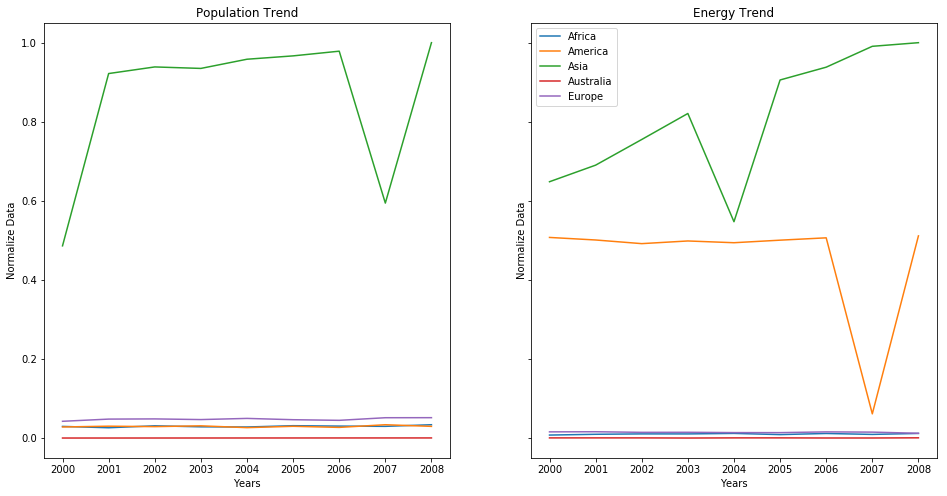

In [67]:
fig, (ax1,ax2) = plt.subplots(1,2,sharey=True,sharex=True,figsize=(16,8))
for i in p.index:
    fig1 = ax1.plot(p.loc[i])
    fig2 = ax2.plot(e.loc[i])
ax1.set_title('Population Trend')
ax1.set_xlabel('Years')
ax1.set_ylabel('Normalize Data')
plt.title('Energy Trend')
plt.ylabel('Normalize Data')
plt.xlabel('Years')
plt.legend(p.index);

**Observations:**
- The world population is dominated by Asia
- The main continents that produce energy are Asia and America
- Asia has a positive trend in energy production
- America could be consider as a constant energy production
- The two decreases of energy production (2004 and 2007) are related to each main energy productors
- Asia could be related to 2004 energy production decrease
- America could be related to 2007 energy production decrease
- Asia population and America energy production could be related

<a id='conclusions'></a>
## Conclusions

- Results Summary:
    - From a worldwide view, population and energy production could be consider as positive trends but with different rates.
    - Population trend has a major increase in the year 2001 and a recovery increase in 2008.
    - Energy production has two years with a observed decrease.
    - Worldwide population and energy production trends have a major decrease in 2007.
    - The world population is dominated mainly by Asia.
    - The leaders in energy production are Asia and America.
    - Asia has a positive trend in energy production, while America could be consider as a constant energy production.
    - The two decreases of energy production (2004 and 2007) are related to each continent main energy productors.

- The decrease in 2007 of the population of Asia and the energy production of America could be related, so we recomend to analize the correlation between them and if one can be predicted by the other.

### Limitations

The energy production dataset has information up to 2009, moreover this last year has many NaN values. This limits the analysis to before 2009, which implies in obsolete conclusions.

In [91]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0